# Exploring Uber and Lyft Prices in Boston

Name: Jimin Lee, Sarah He


## 1. Introduction

We are using the data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). The data is saved in `utility/data/rideshare_kaggle.csv`. Our goal is to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

The data contains information about rides in Boston, Massachusetts and the weather information corresponding to the day of the ride. The data of rides is most likely from Uber and Lyft, and the data of weather may come from the weather station in Boston. The owner of the data does not specify how the data was obtained. There are 693071 examples and 57 features. Approximately half of the data is from Uber and the other half is from Lyft. The features describe each ride by its ride type, location, date, price, and weather-related information such as temperature, precipitation, and humidity. The features have a variety of data types, from integers and floats to objects like string. For example, source, timezone, destination features are in string, while weather-specific informations such as temperature, humidity, and precipIntensity are in float. The only feature with NaN values, however, is the price feature, where only 637976 out of 693071 are non-null. Some of the categorical features have categories that are not very interpretable, such as the 'product_id' which contains strings of letters and numbers in half of the category names. Another interesting is the time range of the data is between November and December, which explains why many weather-specific features such as temperature have small range. The ranges of latitude and longitude features are also small, most likely because the data only applies to rides in Boston, Massachusetts. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('./utility/data/rideshare_kaggle.csv')
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
print(data.shape)
print(data.columns)

(693071, 57)
Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'app

In [5]:
# understand the data types of each feature
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
print(data['cab_type'].value_counts())

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


In [7]:
# unique labels of 'product_id'
print(data['product_id'].value_counts())

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64


In [8]:
# the range of months in the data
print(f"The range of months in the data is from {data['month'].min()} to {data['month'].max()}")

The range of months in the data is from 11 to 12


In [9]:
# the features with range of less than 10 in their respective units:
print([i for i in data.select_dtypes(include = [np.number]).columns if (data[i].max() - data[i].min() < 10)])

['month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'humidity', 'visibility', 'cloudCover', 'uvIndex', 'visibility.1', 'moonPhase', 'precipIntensityMax']


In [10]:
# range of latitude and longitude values: 
print(data['latitude'].min(), data['latitude'].max())
print(data['longitude'].min(), data['longitude'].max())

42.2148 42.3661
-71.1054 -71.033


## 3. Data Wrangling

We need to handle the NaN values identified in the 'price' feature. Dropping the rows with NaN values is not the most ideal, because they may provide imporant information. However, since the owner did not provide the source of the data or explain how he collected the data, dropping the rows is the best compromise now.

In [11]:
clean_data = data.dropna()

In [12]:
sum(clean_data.isna().sum(axis=0))

0

The original datetime feature has 31350 unique values, which will be an obstacle when plotting time series plot. Therefore, we converted the values in the datetime feature to the 'datetime' data type in pandas and stripped the values to month and day, since the year is the same among all values. We also converted the dates to the days of the week and saved it as a column 'day_week'. 

In [13]:
clean_data['datetime'][:5]

0    2018-12-16 09:30:07
1    2018-11-27 02:00:23
2    2018-11-28 01:00:22
3    2018-11-30 04:53:02
4    2018-11-29 03:49:20
Name: datetime, dtype: object

In [14]:
len(clean_data['datetime'].unique())

31350

In [15]:
datetime = pd.to_datetime(clean_data['datetime'])
date = datetime.dt.strftime('%m-%d')
clean_data.insert(loc = 0, column = 'date', value = date)
clean_data['date'][:5]

0    12-16
1    11-27
2    11-28
3    11-30
4    11-29
Name: date, dtype: object

We found that there are some repetitive features in the weather data, like 'visibility' and 'visibility.1', that could be dropped from the data. There are also a lot of features about temperature. When we looked at the data on Kaggle, Kaggle shows that the distribution of temperature-features are very similar, and hence we decided to only keep the 'temperature' feature. We also dropped the features related to precipitation, because Kaggle shows that most of the values in the features are zeros, indicating that those features will not provide much meaningful information. In addition, features like 'latitude', 'longitude', and 'timezone' have small range of values and are not meaningful since the data collected is strictly limited to Boston. We also dropped featuresthat seemed irrelevant, such as 'moonphase' and 'ozone'. We dropped 'product_id' feature, because as we showed in problem 1, some of the product IDs do not have interpretable names. Finally, we dropped hour, day, month, and datetime, because we encapsulated them into one feature, 'date,' of a more appropriate data type of 'datetime'. 

In [16]:
drop_features = ['visibility.1', 'moonPhase', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'windGustTime', 'uvIndexTime', 
'icon', 'dewPoint', 'ozone', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'apparentTemperature',
'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'cloudCover',
 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'latitude', 'longitude', 'timezone', 'short_summary', 'long_summary', 'precipIntensityMax', 'precipIntensity', 'precipProbability']

In [17]:
clean_data = clean_data.drop(labels = drop_features, axis = 1)

In [18]:
clean_data.columns

Index(['date', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'humidity', 'windSpeed', 'windGust',
       'visibility', 'pressure', 'windBearing', 'uvIndex', 'sunriseTime',
       'sunsetTime'],
      dtype='object')

## 4. Data Profiling

**Heat Map of Select Features in Data:**
<a id='Heat_Map_of_Select_Features_in_Data'></a>

From the correlation matrix, none of the weather features correlate with 'price' and 'surge_multiplier,' as the white color represents 0 correlation. There are some negative correlations between the weather-related features, but they are not very informative, as they are natural observations. For example, when humidity is high, we expect visibility to be low, which explains why they have strong, negative correlation.

In [19]:
heatmap_features = ['price', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed', 'windGust', 'visibility', 'pressure', 'windBearing', 'uvIndex',
'sunriseTime', 'sunsetTime']

In [20]:
heatmap_data = clean_data[heatmap_features].corr(numeric_only=True)

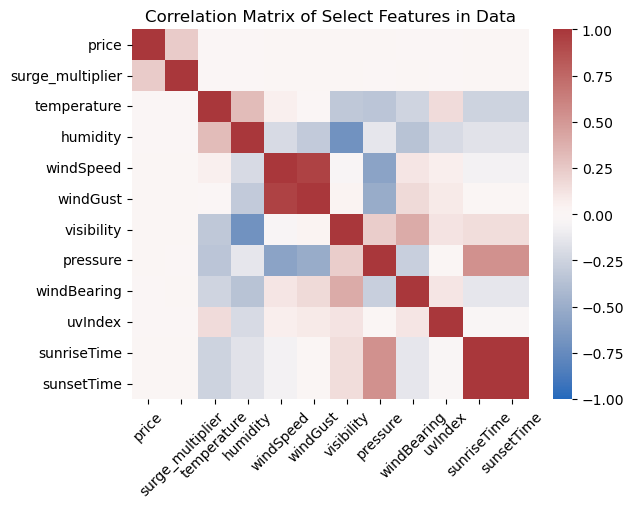

In [21]:
sns.heatmap(heatmap_data, cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Select Features in Data')
plt.show()

**Violin Plot of Prices by Uber and Lyft:**
<a id='Violin_Plot_of_Prices_by_Uber_and_Lyft'></a>

The distribution of prices in Uber and Lyft are similar. Their median values only differ by 4 dollars and their mean values have difference of less than 2 dollars. Although they are small differences, Lyft has both a higher median and higher mean price vaue. This is because as the violin plot shows, the price distribution of Uber rides are heavily clustered on the lower end, while the price distribution of Lyft rides are more evenly spread out in the lower end of prices. The plot also shows that Lyft rides have a greater range. Our initial assumption is that some Lyft rides traveled greater distances than Uber rides, since intuitively, distance would correlate with prices.

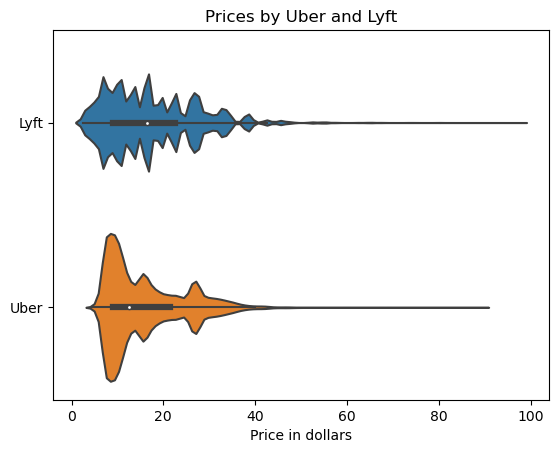

In [22]:
sns.violinplot(data = clean_data, x = 'price', y = 'cab_type')
plt.title("Prices by Uber and Lyft")
plt.xlabel("Price in dollars")
plt.ylabel("")
plt.show()

In [23]:
uber_data = clean_data[clean_data['cab_type'] == 'Uber']
lyft_data = clean_data[clean_data['cab_type'] == 'Lyft']

In [24]:
print(f"Uber: from ${uber_data['price'].min()} to ${uber_data['price'].max()}")
print(f"Lyft: from ${lyft_data['price'].min()} to ${lyft_data['price'].max()}")

Uber: from $4.5 to $89.5
Lyft: from $2.5 to $97.5


In [25]:
uber_median = uber_data['price'].median()
lyft_median = lyft_data['price'].median()
lyft_median - uber_median

4.0

In [26]:
uber_mean = uber_data['price'].mean()
lyft_mean = lyft_data['price'].mean()
lyft_mean - uber_mean

1.5560529581068039

From the density plot, we can see that the distributions of distance travelled by Uber and Lyft are similar, with the majority of rides having a distance below 4 miles. They also have similar peaks of distance travelled. However, the plot shows us that Uber has a greater range of distances travelled compared to Lyft. This is unexpected, because in the violin plot of prices, we saw that Lyft has a greater range of prices. Since the range of distance would intuitively correlate with the range of price, with larger distance resulting in higher price, we were expecting Lyft to have a greater range of distances, too. The density plot also fails to explain why Uber prices are more clustered near the lower end of prices, since Uber and Lyft have similar peaks of distance travelled by their rides. We want to examine what factors may be influencing the discrepancy in the range of price and distance in Uber and Lyft.

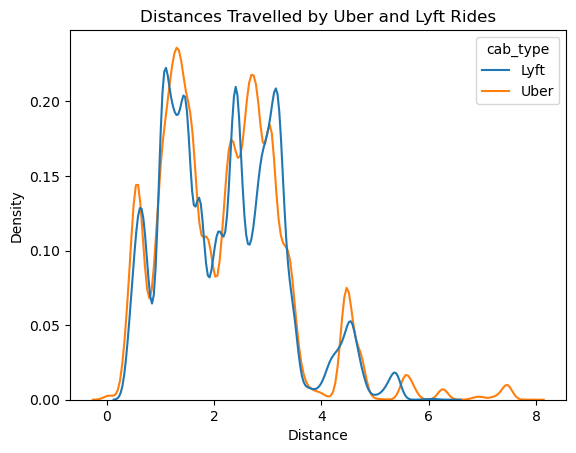

In [27]:
sns.kdeplot(data = clean_data, x = 'distance', hue = 'cab_type')
plt.title("Distances Travelled by Uber and Lyft Rides")
plt.xlabel('Distance')
plt.show()

In [28]:
print(f"Uber: from {uber_data['distance'].min()} miles to {uber_data['distance'].max()} miles")
print(f"Lyft: from {lyft_data['distance'].min()} miles to {lyft_data['distance'].max()} miles")

Uber: from 0.02 miles to 7.86 miles
Lyft: from 0.39 miles to 6.33 miles


Since this is the data profiling step, we then proceeded to look at the distribution of other features, such as source and destination with respect to price

The 7-dollar trip from Haymarket Square to North Station has the greatest frequency at 2051 among all trips in the data. Since there are multiple combinations of price, source, and destination that represet all trips in the data, we decided to get a glimpse of how Uber and Lyft prices are distributed across the sources by looking at the specific trip from Haymarket Square to North Station. 

In [29]:
clean_data.groupby(['price','source', 'destination']).count().reset_index()[['price', 'source','destination','id']].sort_values(ascending = False, by='id')[:5]

,price,source,destination,id
421,7.0,Haymarket Square,North Station,2051
417,7.0,Financial District,South Station,1952
444,7.0,South Station,Financial District,1837
432,7.0,North Station,Haymarket Square,1831
420,7.0,Haymarket Square,Financial District,1809


There are nearly equal number of Uber and Lyft rides in the trips from Haymarket Square to North Station. 

In [30]:
haymarket_to_north = clean_data[(clean_data['source'] == 'Haymarket Square') & (clean_data['destination'] == 'North Station')]

In [31]:
haymarket_to_north['cab_type'].value_counts()

Uber    4560
Lyft    4314
Name: cab_type, dtype: int64

The peak of the distribution is at 7 dollars, which we already knew from having calcuated the most frequent trip in the data. Interestingly, the distribution of Lyft rides appear to be more evenly spread out across the price range, while the Uber rides appear to be centered at the peak value of 7 dollars. This observation aligns with what we noted from looking at the violin plot of prices in Uber and Lyft. We noted earlier that Lyft prices are more evenly spread out while Uber prices are clustered on the lower end of the prices. Another thing we notice from the histogram is that the Uber prices appear to be more continuous than the Lyft prices, which appear to have a few distinct price values across the entire range. Although there seems to be general pattern we are noticing, since this histogram only examines one route, from Haymarket Square to North Station, we want to explore further to determine if this pattern is observed across the entire data in **Problem 5**.

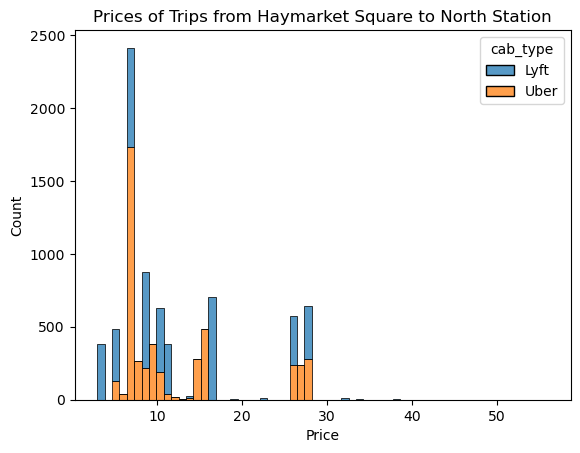

In [32]:
sns.histplot(data = haymarket_to_north, x = 'price', hue = 'cab_type', multiple = 'stack')
plt.title("Prices of Trips from Haymarket Square to North Station")
plt.xlabel("Price")
plt.show()

As our final step of data profiling, we plotted the change in prices across time in Uber and Lyft rides.

The prices in Uber and Lyft rides do not appear to fluctuate signficantly. They both peaked around 12/09 but maintained constant average price across most of the dates. Uber has higher mean price value than Lyft, which we had noted earlier when looking at the violin plot of prices. Since there are no significant difference in the prices, we can assume that the preferences over Uber and Lyft did not change over time, at least in the data given.

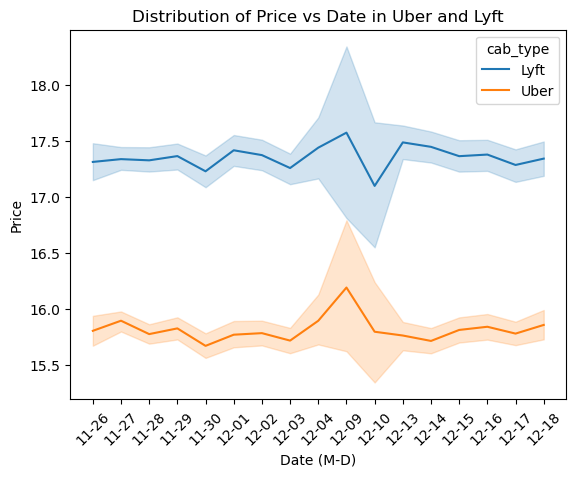

In [33]:
line_data = clean_data.sort_values(by = 'date')
sns.lineplot(data = line_data, x = 'date', y='price', hue = 'cab_type')
plt.title("Distribution of Price vs Date in Uber and Lyft")
plt.xlabel("Date (M-D)")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

## 5. Form a Hypothesis

From the data profiling step, we first noted that weather-related features do not have significant correlation with price. We also noted a counter-intuitive observation that Uber has a greater range of travel distances, but not a greater range of prices. We had expected Uber, not Lyft, to have a greater range of prices, because we had assumed that distance would strictly correlate with price. From this observation, we first got the idea that there may be other features in some relationship to the price. In addition, we noticed that Uber prices are clustered in the lower end of prices, while Lyft prices are more spread out. 

We hypothesize that distance, surge multiplier, and ride type contribute to the difference in the distribution of prices in Uber and Lyft, while temperature does not. We derived our hypothesis from the clues that weather-related features have low correlation with price and that the features we chose have a high likelihood of being related to price.

We plan to plot price with distance, surge multiplier, ride type, and temperature, and explore if any one of them display patterns that may explain the difference in price distributions we noticed. We will also plot price against temperature to examine if temperature really does not affect price distribution in Uber and Lyft

## 6. Investigate the Hypothesis

**Scatter Plot of Distance vs Price:**
<a id='Scatter_Plot_of_Distance_vs_Price'></a>

We first graphed the scatter plot of price values versus distance. The Uber and Lyft prices seemed to follow two distinguished patterns. The Lyft prices appear to be more vertically distributed while the Uber prices appear to be more horizontally distributed across the x-axis. Interestingly, this connects back to the bar plot in **Problem 3** describing the price distribution in the trips from Haymarket Square to North Station. In that bar plot, the distribution of Lyft prices appeared to be more evenly spread out and almost discrete while the Uber prices peaked at lower price values and appeared to be more continous. The scatterplot reflects the same pattern. The gaps between the Lyft price values make the distribution appear vertical, as if they are discrete bar plots. The length of those vertical lines are nearly equal at each price value, with the exception of high price values above 60 dollars, which indicates that the different price values are approxiately equally distributed. This is like how we noticed that the price values were evenly spread out on the lower end from plots we made previously. The Uber prices, on the other hand, have no visible gaps between the price values, as continuous variables should, and seem to be clustered near the lower end of prices, which indicates that the price distribution in other sources most likely peak at lower price values as in the bar plot of prices in trips from Haymarket Square to North Station. 

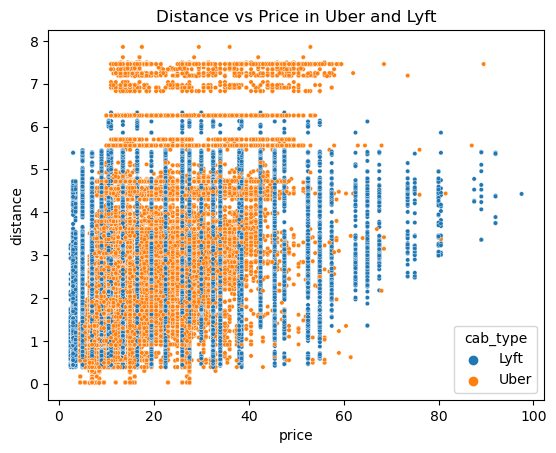

In [34]:
sns.scatterplot(data = clean_data, x = 'price', y = 'distance', hue = 'cab_type', s = 10)
plt.title("Distance vs Price in Uber and Lyft")
plt.show()

To better understand the difference in the price distribution between Uber and Lyft, we looked at their surge multipliers.

At least in the trips collected by the data, Uber charges constant prices, while Lyft has multiple surge multiplier values, indicating that they charge different prices based on the other conditions. We explored the effect of surge multiplier value on price by assigning it as the color feature in the same scatterplot between price and distance.

In [35]:
uber_data['surge_multiplier'].value_counts()

1.0    330568
Name: surge_multiplier, dtype: int64

In [36]:
lyft_data['surge_multiplier'].value_counts()

1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

**Scatter plot of Surge Multiplier in Lyft:**
<a id='Scatter_plot_of_Surge_Multiplier_in_Lyft'></a>

The data shows that the prices above 40 dollars are generally affected by the surge multiplier. This suggests that the Lyft prices are not very clustered on the low end of prices unlike Uber prices because of the surge multiplier, as  the surge multiplier spreads out the price values across the price range. If Lyft did not have varying surge multiplier values, the distribution of Lyft prices would most likely be also clustered on the lower end of the price range like Uber prices.

The less continuous appearance of the Lyft price distribution may also be influeced by surge multiplier. The surge multiplier may be converging continous values of prices to a few values, despite the continuous range of distance values. The difference in surge multiplier in Uber and Lyft rides seem to be a probable explanation of the difference in price distribution against distances travelled.

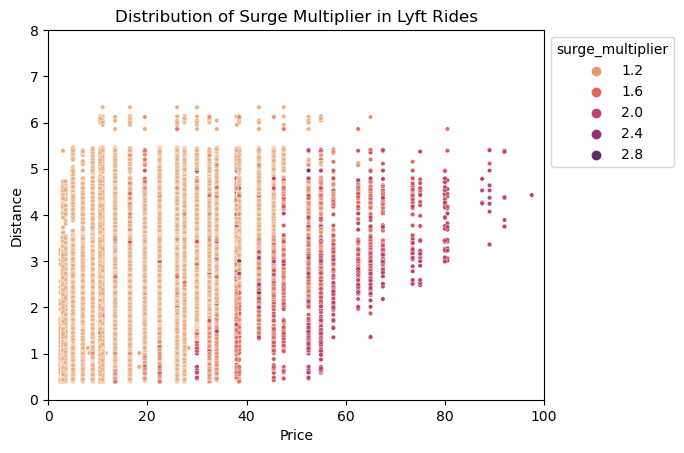

In [37]:
lyft_surge = sns.scatterplot(data = lyft_data, x = 'price', y = 'distance', hue = 'surge_multiplier', palette= "flare", s = 10)
sns.move_legend(lyft_surge, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution of Surge Multiplier in Lyft Rides")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

We now examine if ride types have a relationship with the difference in the price distribution between Uber and Lyft.

In [38]:
clean_data[['name', 'cab_type', 'price']].groupby(['name', 'cab_type']).mean().reset_index().sort_values(by = 'price')

,name,cab_type,price
7,Shared,Lyft,6.029893
8,UberPool,Uber,8.752500
5,Lyft,Lyft,9.610885
11,WAV,Uber,9.765019
9,UberX,Uber,9.765074
6,Lyft XL,Lyft,15.309363
10,UberXL,Uber,15.678144
2,Lux,Lyft,17.771240
0,Black,Uber,20.523786
3,Lux Black,Lyft,23.062468


Because Uber and Lyft have different ride types, we first pair up the ride types by their functionality and if there are no overlapping functionality, by prices. For example, Although Lyft and WAV (wheelchair accessible) have similar mean price, we paired up Lyft with UberX since they are the most basic and the most popular ride type and hence have the same functionality. We paired WAV instead with Lyft XL which has the next closest mean price and also have a more similar functionality, since both have bigger sizes to accomodate the customer. Following the same logic, we paired up Shared with UberPool, Lyft with UberX, LyftXL with WAV, Lux with UberXL, Black with Lux Black, and Black SUV with Lux Black XL. 

In [39]:
uber_ride_names = {'UberPool':'Type 1', 'UberX': 'Type 2',  'WAV': 'Type 3', 'UberXL': 'Type 4', 'Black':'Type 5', 'Black SUV':'Type 6'}
lyft_ride_names = {'Shared':'Type 1', 'Lyft': 'Type 2', 'Lyft XL': 'Type 3', 'Lux': 'Type 4', 'Lux Black':'Type 5', 'Lux Black XL':'Type 6'}

In [40]:
uber_ride_type = uber_data['name'].map(uber_ride_names)
uber_data.insert(loc = 0, column = 'ride_type', value = uber_ride_type)

lyft_ride_type = lyft_data['name'].map(lyft_ride_names)
lyft_data.insert(loc = 0, column = 'ride_type', value = lyft_ride_type)

In [41]:
print("Paired Uber and Lyft Ride Types:\n")
for pair in list(zip(uber_ride_names.values(), zip(uber_ride_names.keys(), lyft_ride_names.keys()))):
    print(pair)

Paired Uber and Lyft Ride Types:

('Type 1', ('UberPool', 'Shared'))
('Type 2', ('UberX', 'Lyft'))
('Type 3', ('WAV', 'Lyft XL'))
('Type 4', ('UberXL', 'Lux'))
('Type 5', ('Black', 'Lux Black'))
('Type 6', ('Black SUV', 'Lux Black XL'))


In [42]:
combined_data = pd.concat([lyft_data,uber_data])
column_order = [f'Type {i}' for i in range(1,7)]

**Linear Regression Models of Price vs Distance for Different Ride Types:**
<a id='Linear_Regression_Models_of_Price_vs_Distance_for_Different_Ride_Types:'></a>

The linear regression model plot suggests that the ride types have a relationship with the distribution of price across distances in Uber and Lyft rides. The plot shows us that in ride type 1 and 2, which correspond to the carpool type and the most basic type, the price distribution are extremely similar between Uber and Lyft. However, as the functionality of the ride types diversifies and the mean price increases, the difference in the distribution of price with respect to distance becomes more evident. The difference lies in that the slope of the regression line representing Lyft prices decreases across the ride types, while the slope of the line representing Uber prices seems to remain constant. This means that when travelling longer distances in ride types other than ride type 1 and 2, Lyft rides charge higher prices than Uber. The fact that Uber prices do not change significantly across the ride types may be because it does not apply surge multiplier to its rides. In the case of Lyft, however, it appears that the effect of surge multiplier is greater for ride types of greater functionality, such as Black SUV and LUX Black XL, which correspond to ride type 6. Indeed, looking at the plot for ride type 6, the range of prices covered is longer than the other ride types. 

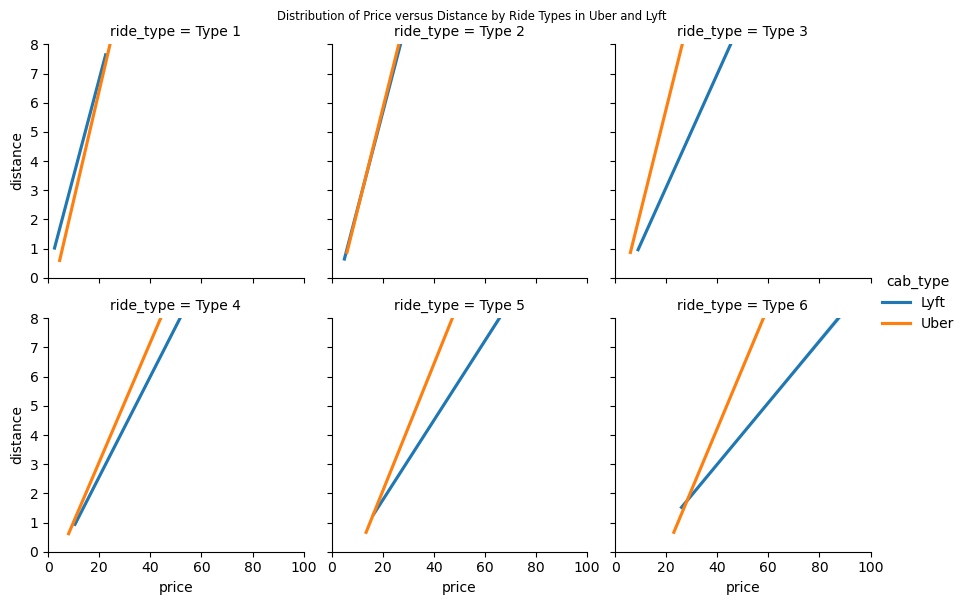

In [43]:
sns.lmplot(data = combined_data, x = 'price', y = 'distance', hue = 'cab_type', col = 'ride_type', col_order = column_order, height = 3, col_wrap = 3, scatter = False)
plt.suptitle("Distribution of Price versus Distance by Ride Types in Uber and Lyft\n", y = 1, size = 'small')
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

**Line plot of Temperature and Price in Uber and Lyft**
<a id='Temperature_versus_Price_in_Uber_and_Lyft'></a>

Lastly, we examined if there is a relationship between the temperature and the prices in Uber and Lyft rides.

The distribution of Lyft and Uber rides across temperature is almost exactly the same. This suggests that the change in temperature did not result in preference of Uber or Lyft over the other. The second plot also shows that the changes in temperature did not result in signficant change in the mean prices charged. The two lines appear horizontally linear and the values are centered around the mean price values of Lyft and Uber that we computed earlier.

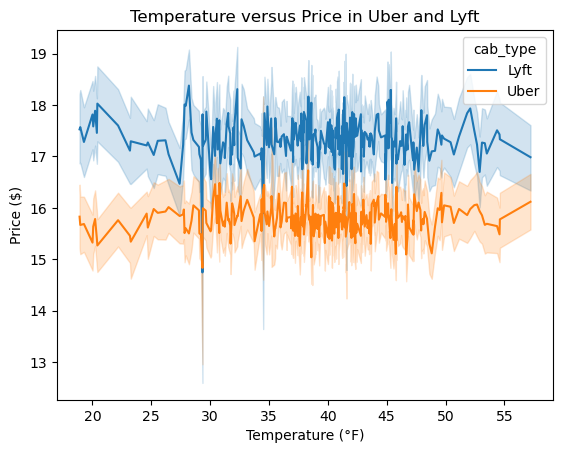

In [44]:
sns.lineplot(data = clean_data, x = 'temperature', y='price', hue = 'cab_type')
plt.title("Temperature versus Price in Uber and Lyft")
plt.xlabel("Temperature (°F)")
plt.ylabel("Price ($)")
plt.show()

## 7. Summarize Results

First, we graphed a [Scatter_Plot_of_Distance_vs_Price](#Scatter_Plot_of_Distance_vs_Price) and noticed that Uber and Lyft prices seem to follow two distinguished patterns. The Lyft prices appear to be more vertically distributed, while the Uber prices appear to be more horizontally distributed. For Lyft, prices are more discrete and approxiately equally distributed, except for those very large price values. For Uber, on the other hand, prices are more continuous and more clustered at the lower values.

To better understand the difference between the Uber and Lyft prices, we took a closer look at their surge multipliers. We found that Uber has only one surge multiplier value and charges constant prices, while Lyft has multiple surge multiplier values, meaning it charges different prices based on different conditions. According to our [Scatter_plot_of_Surge_Multiplier_in_Lyft](#Scatter_plot_of_Surge_Multiplier_in_Lyft), the Lyft prices above 40 dollars are generally affected by larger surge multipliers.

We then looked at the pricing pattern of Uber and Lyft by the ride types. We grouped the ride types of Uber and Lyft (6 each) into pairs by their similarity in price distribution and functionality. From our
[Linear Regression Models of Price vs Distance for Different Ride Types](#Linear_Regression_Models_of_Price_vs_Distance_for_Different_Ride_Types), we noticed that the slope of regression lines representing Uber prices appeared more constant across the ride types than Lyft prices. We connected the observation back to how Uber did not have varying surge multiplier values, while Lyft did. The effect of surge multiplier seemed to increase in ride types of greater functionality, which aligned with the observation we made in [Scatter plot of Surge Multiplier in Lyft](#Scatter_plot_of_Surge_Multiplier_in_Lyft). The ride types of greater functionality had greater mean prices, mostly over 40 dollars. The longer range of prices in Lyft ride types of higher average price also aligns with the [Violin Plot of Prices by Uber and Lyft](#Violin_Plot_of_Prices_by_Uber_and_Lyft). One of our first observation was that while Uber has longer range of distances, Lyft has the longer range of prices, which baffled us. The observations we made in Problem 5 collectively helped us answer our question. It appears that Lyft prices apply surge multiplier to their rides, which makes the price values appear less continous, as the surge multiplier makes continous price values converge to a few values. The surge multiplier is also applied by the ride types, with greater surge multiplier for ride types of greater functionality and mean price, which spreads out the range of price values. 

Lastly, we examined the effect of temperature on the choice of Uber and Lyft rides and prices. There was no obvious indicator that changes in temperature affected the mean prices of Uber and Lyft in the [Line plot of Temperature and Price](#Temperature_versus_Price_in_Uber_and_Lyft). Although no significant conclusion was made, it correlated with our finding from the [Heat Map of Select Features in Data](#Heat_Map_of_Select_Features_in_Data) that there is nearly zero correlation between weather-related features and price or surge multiplier features. 

In conclusion, we proved that distance, surge multiplier, and ride type contribute to the difference in the distribution of prices in Uber and Lyft, while temperature does not. 

## 8. Critically Review the Workflow and Discuss Ethical Concerns
* Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

From the business perspective, the primary stakeholders are Uber and Lyft, because from this dataset, they could analyze the cab rides of their own and of the other to decide how they could improve their services to increase their profit. From the social perspective, the primary stakeholders are the people in Boston, because this dataset allows them to compare how Uber and Lyft charge differently under different conditions. The observations we made can help them make more informative decision when choosing between Uber and Lyft.

We noticed that there may have be some ethical issues involved in the process of data acquisition and data analysis. It is important to note that the owner of the dataset does not specify where and how the data was collected. In the absence of this information, we cannot conclude that this data was collected with the consent of the customers and that the process was legal. Since we are unaware of the source, we need to be cautious when presenting the observation to the public and understand that by using the data whose source is unknown, we are also responsible for the ethical repercussions from releasing our analysis of the data. In addition, we need to consider the possiblity of the data revealing important information about the customers. Although the data anonymizes each rides, there are specific features including but not limited to hour, day, month, source, destination, distance, cab type, and price. By closely analyzing these data, people with wrongful intensions may be able to trace the flow of cab passengers from certain sources to destinations at certain hours of a month. This could lead to a violation of privacy of certain populations, such as university students.

To resolve the ethical issues, it would be best to contact the owner of the data and inquire when, where, and how the data was collected. This would allow us to analyze if there were ethical issues involved in the data acquisition process. We could then decide whether to use this data or not and how our analysis results should be communicated. We could also improve the anonymity of the data. In the data, we noticed that there is an "id" feature comprised of randomized values, suggesting that anonymity was already applied to some extent. Still, we could confirm that anonymity was properly applied and look for a room for improvement. This would strengthen the security of the data, since it will make it more difficult for individuals to identify certain populations and use the information in unethical ways.

For our analysis of the dataset, the 'source', 'destination', 'cab_type', 'name', 'price', 'distance', and 'surge_multiplier' features were informative.

For future analysis, it would be helpful to have data of Lyft rides that travelled longer distances (more than 6 miles) if they exist. This will allow the range of distances for Uber and Lyft to be approximatey equal be the same, which will make their comparison more accurate. We also want to see more information on the surge pricing mechanism of Uber. In this dataset, Uber only has one value for the 'surge_multiplier' feature. We are unsure if Uber has completely gotten rid of their surge priciing policy in Boston, or if the data collected simply failed to capture Uber rides that were affected by surge multiplier values.  Finally, we discussed that we may be able to examine the relationship between weather-related features and the prices of Uber and Lyft rides. Because the data was only collected over the span of November and December, the weather-related features mostly had small ranges of values. If the timeframe of the data spans different seasons, we may see stronger correlations between the weater-related feature and price. 